In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

In [2]:
df = pd.read_csv("sleep_lifestyle_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                514 non-null    int64  
 1   Gender                   514 non-null    object 
 2   Age                      514 non-null    int64  
 3   Occupation               514 non-null    object 
 4   Sleep Duration           514 non-null    float64
 5   Quality of Sleep         514 non-null    int64  
 6   Physical Activity Level  514 non-null    int64  
 7   Stress Level             514 non-null    int64  
 8   BMI Category             514 non-null    object 
 9   Blood Pressure           514 non-null    object 
 10  Heart Rate               514 non-null    int64  
 11  Daily Steps              514 non-null    int64  
 12  Sleep Disorder           244 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 52.3+ KB


### Sudah memenuhi kriteria minimal 500 entri pada dataset yang digunakan

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
print("\n Jumlah Missing Values : ")
print(df.isnull().sum())


 Jumlah Missing Values : 
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             270
dtype: int64


Pada df.isnull().sum() diatas terdapat 270 yang bernilai NaN, Namun pada dataset ini. Nilai Nan berarti bahwa tidak terdapat gangguan tidur yang dialami (insomnia ataupun Sleep Anea)

In [6]:
# Cek jumlah data yang duplikat (baris yang sama persis)
print("\nJumlah Data Duplikat:")
df.duplicated().sum()



Jumlah Data Duplikat:


np.int64(0)

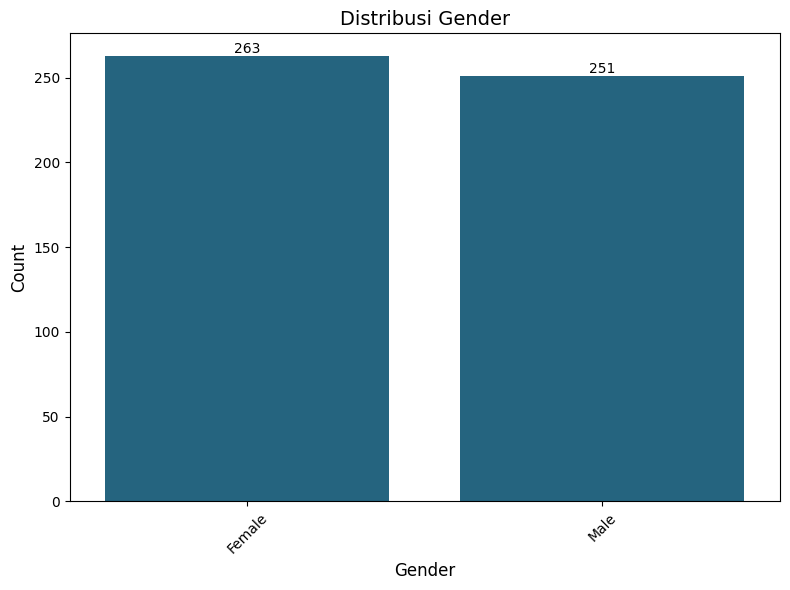

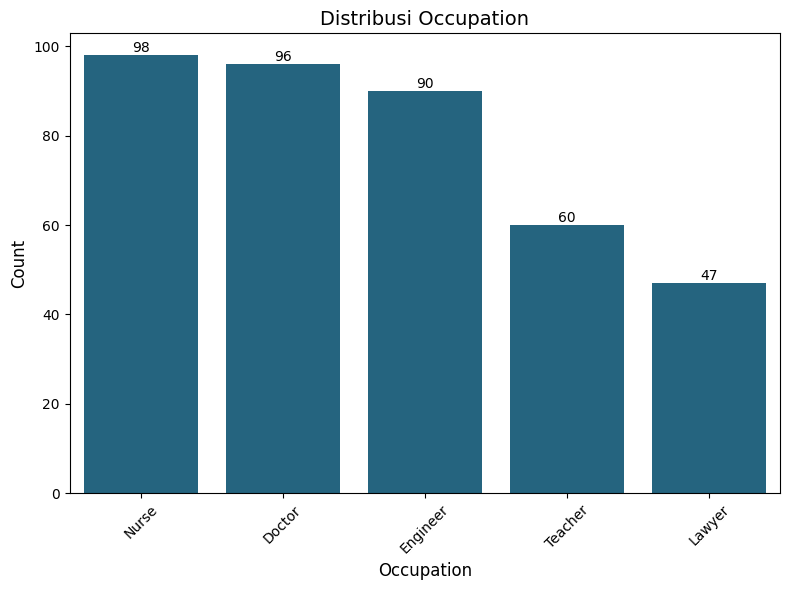

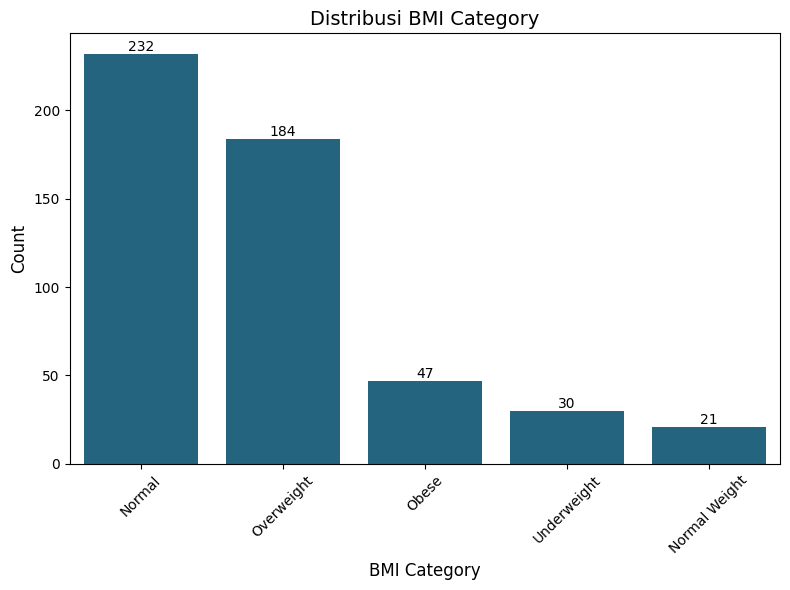

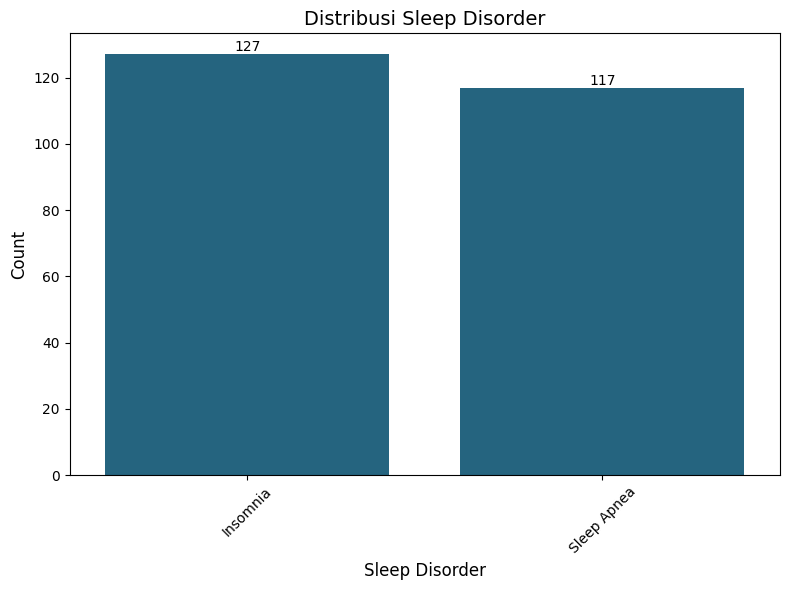

In [7]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for feature in categorical_cols:
    plt.figure(figsize=(8, 6))

    # Ambil hanya 16 kategori paling sering muncul
    top_categories = df[feature].value_counts().nlargest()

    ax = sns.barplot(x=top_categories.index, y=top_categories.values, color="#166A8E")
    ax.bar_label(ax.containers[0], label_type='edge')  

    plt.title(f'Distribusi {feature}', fontsize=14)
    plt.xticks(rotation=45) 
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()

    plt.show()

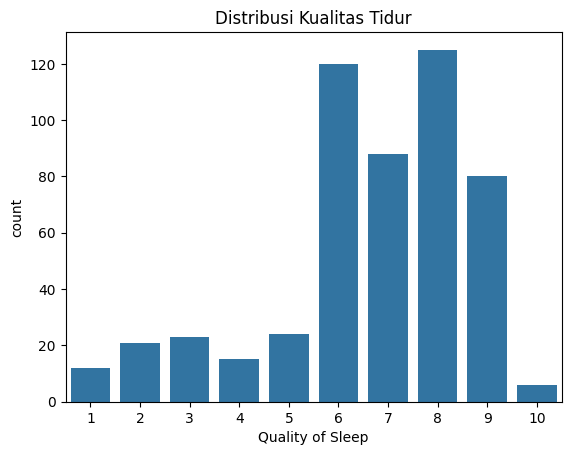

In [8]:
sns.countplot(data=df, x='Quality of Sleep')
plt.title('Distribusi Kualitas Tidur')
plt.show()

Pada distribusi kualitas tidur terdapat orang dengan tidur 1 sampai 10 Jam. Pada distribusi ini, kebanyakan orang sudah memiliki waktu tidur yang cukup yaitu lebih dari 7 jam

In [9]:
numerical_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Quality of Sleep']

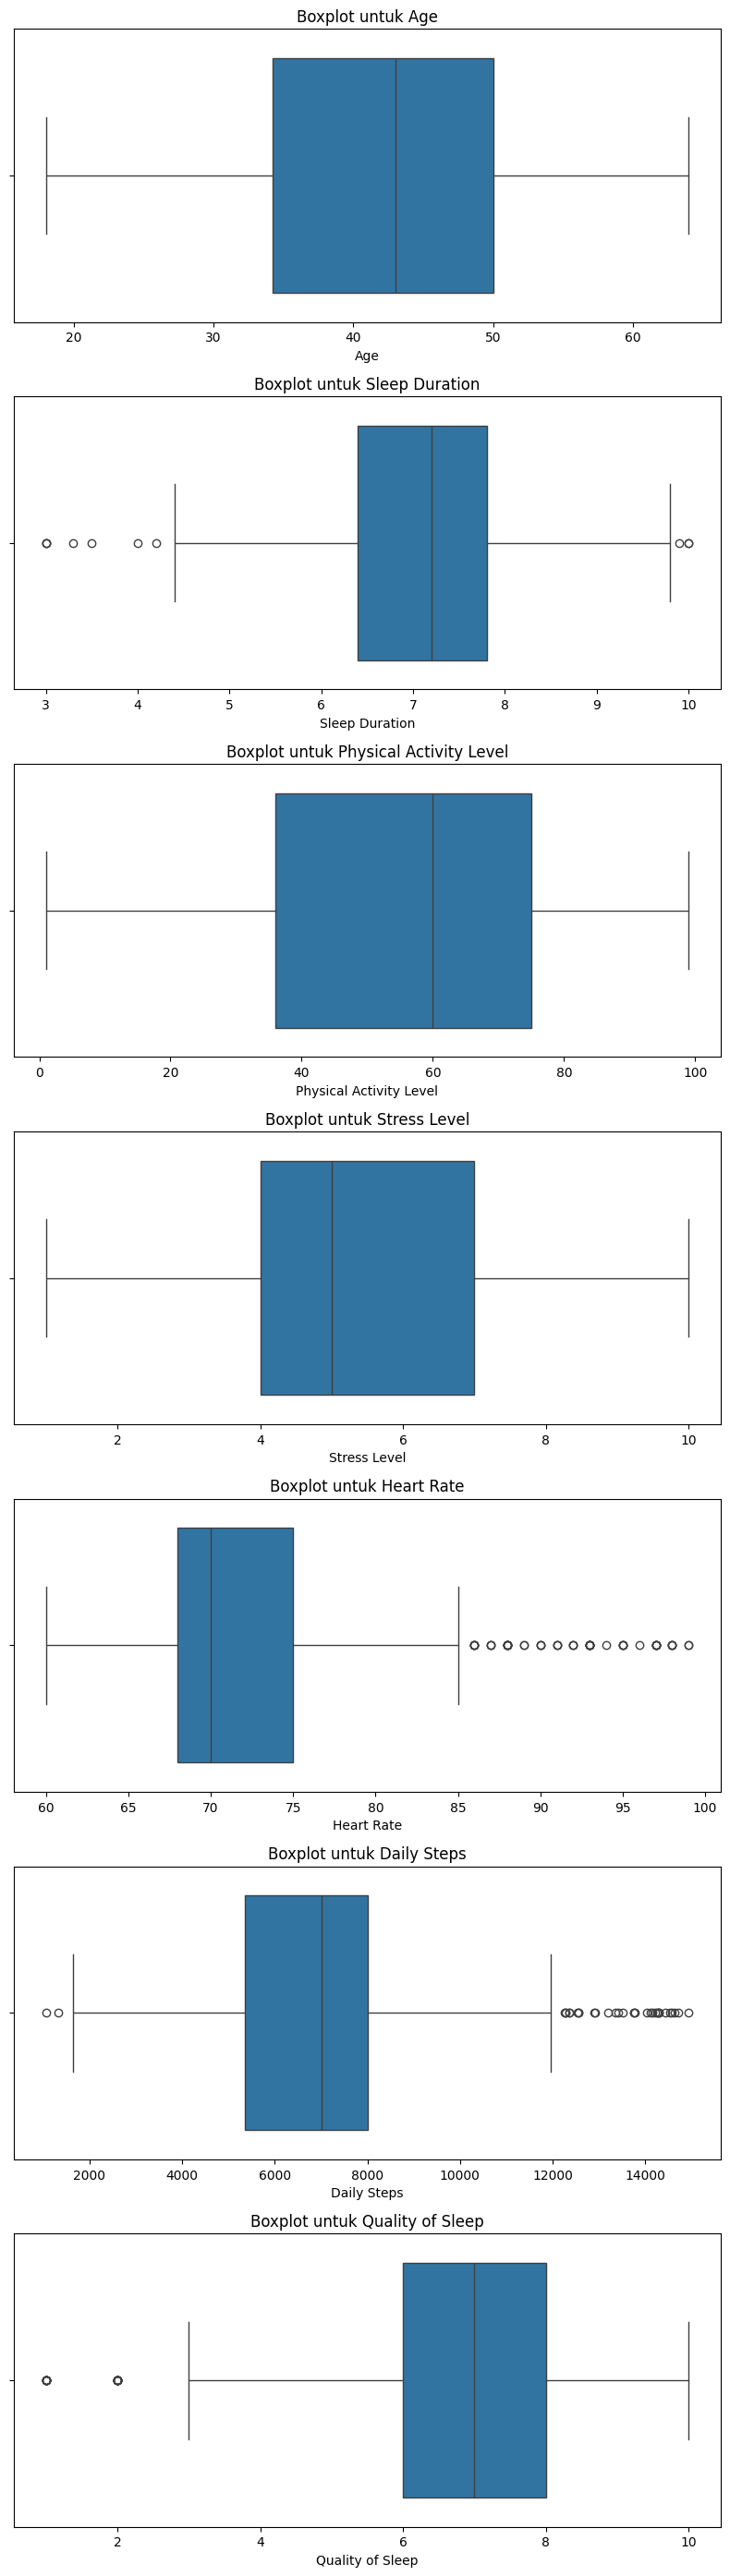

In [10]:
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 4 * len(numerical_cols)))

# Plot boxplot untuk setiap kolom numerik
for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot untuk {col}')

plt.tight_layout()
plt.show()

- Boxplot 'Age' :  Mayoritas individu dalam dataset memiliki usia antara 36 hingga 50 tahun, dengan median sekitar 41-42 tahun. Kotak terlihat cukup simetris, dan median berada di tengah kotak. Whiskers juga tampak relatif simetris. Ini mengindikasikan distribusi usia yang mendekati simetris atau normal. Rentang usia yang dicakup oleh data terlihat cukup luas, dari sekitar 27 hingga 60 tahun. Tidak terdapat outlier
- Boxplot 'Sleep Duration' : Mayoritas individu dalam dataset tidur antara 6.5 hingga 7.8-8.0 jam per hari, dengan median sekitar 7.2-7.3 jam. Namun, terdapat sejumlah kecil individu dengan durasi tidur yang sangat rendah (sekitar 3-4.5 jam) yang teridentifikasi sebagai outlier. Terdapat juga beberapa outlier di sisi atas (durasi tidur sangat tinggi). Distribusi secara keseluruhan sedikit miring ke kiri karena adanya outlier di sisi bawah.
- Boxplot 'Physical Activity Level' : Mayoritas individu dalam dataset melakukan aktivitas fisik harian antara 45 hingga 70-75 menit, dengan median sekitar 55-60 menit. Distribusi aktivitas fisik tampak merata dan tidak memiliki outlier.
- Bloxplot 'Stress Level' : ayoritas individu dalam dataset melaporkan tingkat stres antara 4 hingga 7, dengan median sekitar 5. Distribusi tingkat stres tampak merata dan tidak memiliki outlier yang ekstrem.
- Boxplot 'Heart Rate' : Mayoritas individu memiliki denyut jantung di kisaran 68-73 bpm. Namun, ada beberapa individu yang memiliki denyut jantung jauh di atas rata-rata (85-100 bpm), yang diidentifikasi sebagai outlier. Distribusi Heart Rate miring ke kanan.
- Boxplot 'Daily Steps' : Terdapat beberapa titik individual yang ditampilkan di sisi kiri (bawah) boxplot, di sekitar 1000-2000 langkah. Ini adalah (outliers) yang menunjukkan adanya beberapa individu dengan langkah harian yang sangat rendah. Selain itu, ada juga beberapa outlier di sisi kanan (atas) boxplot, di sekitar 12000-14000 langkah, menunjukkan beberapa individu yang sangat aktif.
- Boxplot 'Quality of Sleep' : Terdapat beberapa titik individual yang ditampilkan di sisi kiri (bawah) boxplot, di sekitar 1.0 hingga 2.0. Ini adalah pencilan (outliers) yang menunjukkan adanya beberapa individu dengan kualitas tidur yang sangat rendah. Tidak ada outlier di sisi kanan. Mayoritas individu dalam dataset memiliki kualitas tidur yang cukup baik, antara 6 hingga 8, dengan median sekitar 7-8 jam


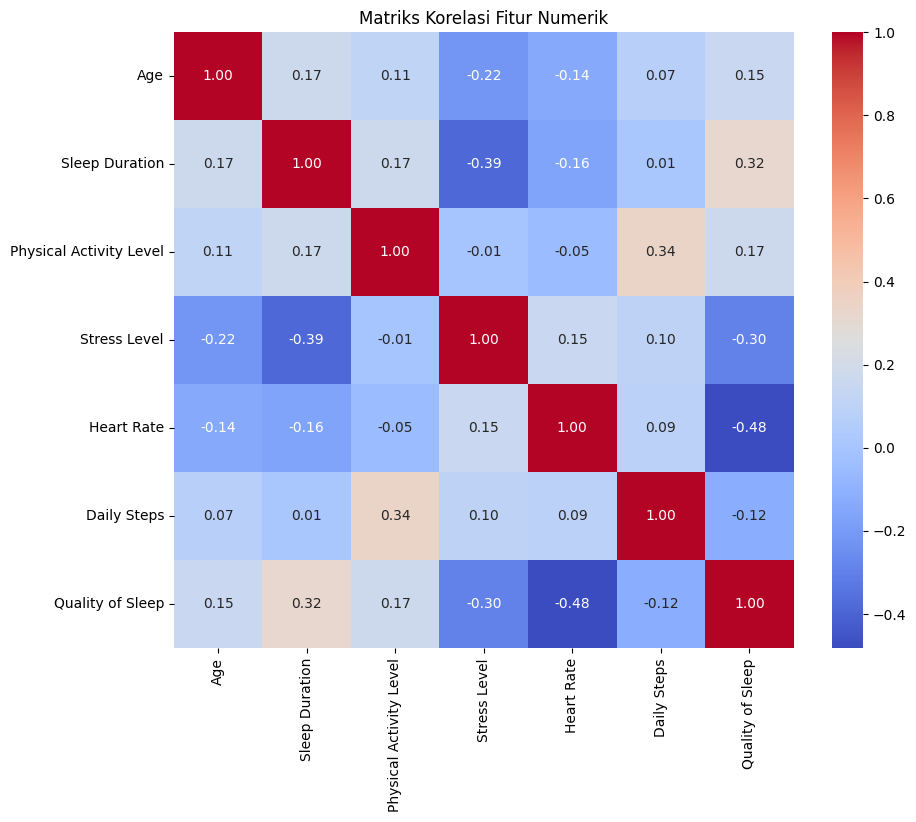

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

*Penjelasan : (Heatmap Matrik)*
Korelasi dengan variabel target, Quality of Sleep, yang berada di baris/kolom paling bawah:

- Quality of Sleep dengan Sleep Duration (0.32): Terdapat korelasi positif sedang. Semakin lama durasi tidur, cenderung semakin baik kualitas tidurnya. Ini adalah hubungan yang logis.
- Quality of Sleep dengan Stress Level (-0.30): Terdapat korelasi negatif sedang. Semakin tinggi tingkat stres, cenderung semakin buruk kualitas tidurnya. Ini juga hubungan yang logis dan signifikan.
- Quality of Sleep dengan Heart Rate (-0.48): Terdapat korelasi negatif yang cukup kuat. Semakin tinggi detak jantung, cenderung semakin buruk kualitas tidurnya. Ini menunjukkan hubungan yang kuat antara kesehatan jantung dan tidur.
- Quality of Sleep dengan Age (0.15): Terdapat korelasi positif yang lemah. Ada sedikit kecenderungan kualitas tidur meningkat seiring bertambahnya usia, namun tidak terlalu kuat.
- Quality of Sleep dengan Physical Activity Level (0.17): Terdapat korelasi positif yang lemah. Semakin tinggi tingkat aktivitas fisik, cenderung sedikit lebih baik kualitas tidurnya.
- Quality of Sleep dengan Daily Steps (-0.12): Terdapat korelasi negatif yang lemah. Sedikit kecenderungan kualitas tidur menurun seiring bertambahnya langkah harian, meskipun ini bisa menjadi anomali atau korelasi tidak langsung. Korelasi ini mungkin tidak signifikan secara praktis.


Korelasi Antar Fitur Prediktor:

- Sleep Duration dengan Stress Level (-0.39): Durasi tidur yang lebih pendek cenderung terkait dengan tingkat stres yang lebih tinggi.
- Stress Level dengan Heart Rate (0.15): Sedikit korelasi positif, tingkat stres lebih tinggi sedikit terkait dengan detak jantung lebih tinggi.
- Heart Rate dengan Daily Steps (0.09): Korelasi positif yang sangat lemah, hampir tidak ada hubungan linier.
- Age dengan Sleep Duration (0.17): Ada sedikit kecenderungan durasi tidur meningkat seiring bertambahnya usia.
- Physical Activity Level dengan Daily Steps (0.34): Korelasi positif sedang, yang logis karena lebih banyak aktivitas fisik seringkali berarti lebih banyak langkah.

# Data Preprocessing

In [12]:
df = df.drop('Person ID', axis=1)
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

*Penjelasan :* 
- Melakukan Dropping pada kolom Person ID
- Mengisi nilai yang hilang atau NaN pada kolom 'Sleep Disorder' dengan No Disorder (Tidak memiliki gangguan tidur)

In [13]:
df.head(7)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


In [14]:
print(f"Jumlah Missing Values :\n{df.isnull().sum()}")

Jumlah Missing Values :
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [15]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop('Blood Pressure', axis=1)

*Penjelasan :*
- Memisahkan nilai pada kolom 'Blood Pressure' yang bertipe data string menjadi 'Systolic BP', 'Diastolic BP' menjadi 2 kolom numerik yang terpisang.

In [16]:
df['Quality of Sleep_Category'] = df['Quality of Sleep'].apply(lambda x: 'Good' if x > 7 else 'Bad')
le_quality = LabelEncoder()
df['Quality of Sleep_Encoded'] = le_quality.fit_transform(df['Quality of Sleep_Category'])
# Simpan mapping untuk interpretasi hasil evaluasi
quality_mapping = dict(zip(le_quality.classes_, le_quality.transform(le_quality.classes_)))
print(f"Quality of Sleep Mapping: {quality_mapping}")

# Simpan mapping untuk interpretasi hasil evaluasi
quality_mapping = dict(zip(le_quality.classes_, le_quality.transform(le_quality.classes_)))
print(f"Quality of Sleep Mapping: {quality_mapping}")

Quality of Sleep Mapping: {'Bad': np.int64(0), 'Good': np.int64(1)}
Quality of Sleep Mapping: {'Bad': np.int64(0), 'Good': np.int64(1)}


*Penjelasan :*
- Kolom Quality of Sleep_Category yang memiliki rentang nilai dari 1 - 10. Akan dikategorikan menjadi 2 kelas : Baik dan Buruk. Kategori akan bernilai Good (Baik apabila skor > 7) dan akan bernilai Bad (Buruk apabila skro <6 )

In [17]:
X = df.drop(['Quality of Sleep', 'Quality of Sleep_Category', 'Quality of Sleep_Encoded'], axis=1)
y = df['Quality of Sleep_Encoded']

In [18]:
# Encoding Fitur Kategorikal (melakukan Label Encoding untuk kesederhanaan awal)
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [19]:
#  Penskalaan/Normalisasi Fitur Numerik
numericals_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']
scaler = StandardScaler()
X[numericals_cols] = scaler.fit_transform(X[numericals_cols])

In [20]:
# Pembagian Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData setelah pra-pemrosesan:")
print(X_train.head())
print(y_train.value_counts())


Data setelah pra-pemrosesan:
     Gender       Age  Occupation  Sleep Duration  Physical Activity Level  \
117       0 -0.491772           0        0.100824                 0.157272   
250       0  0.293840          11       -0.281637                -1.105164   
478       0  0.097437          10        0.483284                -0.179377   
348       0  1.472258           5        1.056975                 0.788491   
486       0 -0.589973           1        0.292054                -0.095215   

     Stress Level  BMI Category  Heart Rate  Daily Steps  Sleep Disorder  \
117     -0.637204             0   -0.575688    -0.097716               1   
250      0.320465             3   -0.942662    -0.481664               0   
478     -2.073708             2   -1.431960     0.801874               2   
348     -1.116039             3   -0.575688    -0.097716               2   
486     -0.158369             4    1.259183    -1.862341               0   

     Systolic BP  Diastolic BP  
117    -1.4

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model Baseline
rf_model_baseline = RandomForestClassifier(random_state=42)

print("Melatih model baseline...")
rf_model_baseline.fit(X_train, y_train) # model Baseline Random FOrest
print("Pelatihan model baseline selesai.")

# Hyperparameter Tuning untuk Random Forest
print("\nMemulai Hyperparameter Tuning untuk Random Forest (GridSearchCV)...")
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model_baseline, param_grid=param_grid,
                              cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print("Hyperparameter Tuning Random Forest selesai.")

Melatih model baseline...


Pelatihan model baseline selesai.

Memulai Hyperparameter Tuning untuk Random Forest (GridSearchCV)...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Hyperparameter Tuning Random Forest selesai.



--- Evaluasi Model Random Forest Terbaik (Tuned) ---
Akurasi: 0.9223

Laporan Klasifikasi:
              precision    recall  f1-score   support

         Bad       0.88      1.00      0.94        61
        Good       1.00      0.81      0.89        42

    accuracy                           0.92       103
   macro avg       0.94      0.90      0.92       103
weighted avg       0.93      0.92      0.92       103


Confusion Matrix:


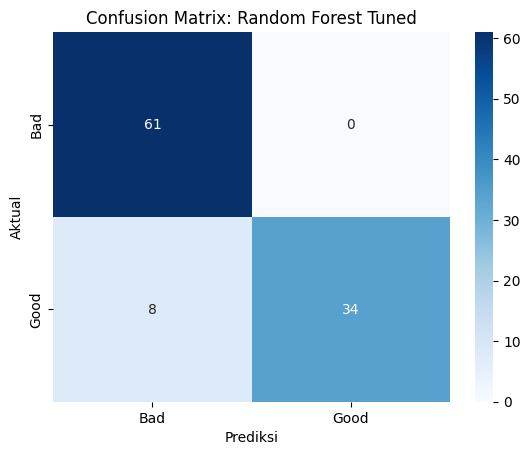

In [22]:
print("\n--- Evaluasi Model Random Forest Terbaik (Tuned) ---")
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Akurasi
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Akurasi: {accuracy_rf_tuned:.4f}")

# Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=le_quality.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_quality.classes_, yticklabels=le_quality.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: Random Forest Tuned')
plt.show()